# Trabalho 3
Descrição do trabalho:

http://webserver2.tecgraf.puc-rio.br/~mgattass/visao/trb/T3.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import time
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn import metrics
import pandas as pd

### Using the Numpy

#### Loss Functions

In [2]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

#### Activation Functions

In [3]:
def tanh(x):
  return np.tanh(x)

def tanh_prime(x):
  return 1 - np.tanh(x) ** 2

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_prime(x):
  s = 1/(1+np.exp(-x))
  ds = s*(1-s)
  return ds

In [5]:
def relu(x):
  return np.maximum(0,x)

def relu_prime(x):
  return (x>0).astype(x.dtype)

#### class Layer

In [6]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

#### class Activation(Layer)

In [7]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

#### class Dense(Layer)

In [8]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient 

#### function predict()

In [9]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

#### function train()

In [10]:
def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            if e % 100 == 0:
                print(f"{e}/{epochs}, error={error:.3}")

#### Example: XOR

In [11]:
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

##### Neural Network

In [ ]:
network = [
    Dense(input_size = 2, 
          output_size = 3),
    Activation(activation = tanh, 
               activation_prime = tanh_prime),
    Dense(input_size = 3, 
          output_size = 1),
    Activation(activation = tanh,
               activation_prime = tanh_prime),
]

##### Training

In [12]:
%%time

train(
    network, 
    mse, 
    mse_prime, 
    X, 
    Y, 
    epochs=10000, 
    learning_rate=0.1)

0/10000, error=0.491
100/10000, error=0.0072
200/10000, error=0.00199
300/10000, error=0.00111
400/10000, error=0.000758
500/10000, error=0.000572
600/10000, error=0.000458
700/10000, error=0.000381
800/10000, error=0.000325
900/10000, error=0.000284
1000/10000, error=0.000251
1100/10000, error=0.000225
1200/10000, error=0.000204
1300/10000, error=0.000186
1400/10000, error=0.000172
1500/10000, error=0.000159
1600/10000, error=0.000148
1700/10000, error=0.000138
1800/10000, error=0.00013
1900/10000, error=0.000122
2000/10000, error=0.000115
2100/10000, error=0.000109
2200/10000, error=0.000104
2300/10000, error=9.9e-05
2400/10000, error=9.45e-05
2500/10000, error=9.04e-05
2600/10000, error=8.67e-05
2700/10000, error=8.32e-05
2800/10000, error=7.99e-05
2900/10000, error=7.7e-05
3000/10000, error=7.42e-05
3100/10000, error=7.16e-05
3200/10000, error=6.92e-05
3300/10000, error=6.69e-05
3400/10000, error=6.48e-05
3500/10000, error=6.28e-05
3600/10000, error=6.09e-05
3700/10000, error=5.92e

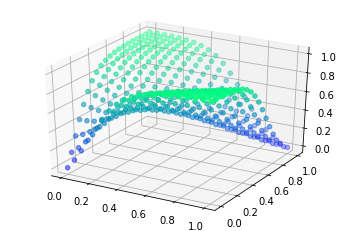

In [13]:
# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()

#### Example: MNIST

In [14]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##### Loading the data

In [15]:
total_examples_train = 1000

In [16]:
total_examples_test = total_examples_train * .1
total_examples_test = int(total_examples_test)

In [17]:
x_train[0].shape

(28, 28)

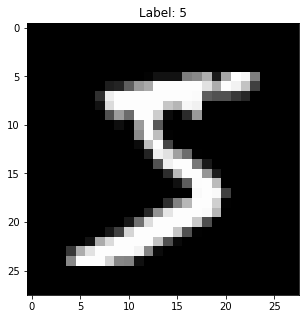

In [18]:
fig, axes = plt.subplots( 1, 1, figsize=( 10, 5 ) )

axes.set_title( f'Label: {y_train[0]}' )
axes.imshow( x_train[0], cmap='gray' )

plt.show()

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

##### Depicting examples

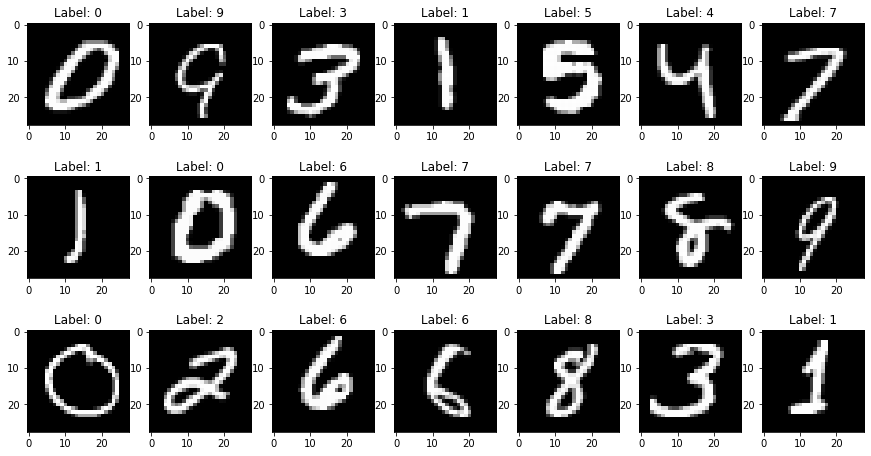

In [20]:
rows = 3
columns = 7

fig, axes = plt.subplots( rows, columns, figsize=( 15, 8 ) )

for i in range(rows):
  for j in range(columns):
    random_number = int(np.random.rand() * total_examples_train)
    axes[i][j].set_title( f'Label: {y_train[random_number]}' )
    axes[i][j].imshow( x_train[random_number], cmap='gray' )

plt.show()

##### Preprocessing Data

In [21]:
def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [22]:
x_train, y_train = preprocess_data(x_train, y_train, total_examples_train)
x_test, y_test = preprocess_data(x_test, y_test, total_examples_test)

##### Neural Network

In [23]:
network = [
    Dense(input_size = 28 * 28, 
          output_size = 40),
    Activation(activation = tanh, 
               activation_prime = tanh_prime),
    Dense(input_size = 40, 
          output_size = 10),
    Activation(activation = tanh,
               activation_prime = tanh_prime),
]

##### Training

In [24]:
%%time

train(network, 
      mse, 
      mse_prime, 
      x_train, 
      y_train, 
      epochs=10000, 
      learning_rate=0.1)

0/10000, error=0.841
100/10000, error=0.0709
200/10000, error=0.0569
300/10000, error=0.0486
400/10000, error=0.0433
500/10000, error=0.0389
600/10000, error=0.0373
700/10000, error=0.0347
800/10000, error=0.0331
900/10000, error=0.0321
1000/10000, error=0.0312
1100/10000, error=0.0301
1200/10000, error=0.0295
1300/10000, error=0.0288
1400/10000, error=0.0279
1500/10000, error=0.0272
1600/10000, error=0.0267
1700/10000, error=0.0261
1800/10000, error=0.0255
1900/10000, error=0.0252
2000/10000, error=0.0251
2100/10000, error=0.0249
2200/10000, error=0.0246
2300/10000, error=0.0244
2400/10000, error=0.0241
2500/10000, error=0.0238
2600/10000, error=0.0228
2700/10000, error=0.0225
2800/10000, error=0.0223
2900/10000, error=0.0222
3000/10000, error=0.0221
3100/10000, error=0.022
3200/10000, error=0.0219
3300/10000, error=0.0218
3400/10000, error=0.0216
3500/10000, error=0.0213
3600/10000, error=0.0208
3700/10000, error=0.0208
3800/10000, error=0.0206
3900/10000, error=0.0206
4000/10000, er

##### Testing

In [25]:
print( f'len(y_test): {len(y_test)}' )

len(y_test): 100


In [26]:
%%time

y_predicted = list()
y_actual = list()

for x, y in zip(x_test, y_test):
    output = predict(network, x)

    y_predicted.append( np.argmax(output) )
    y_actual.append( np.argmax(y) )

    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))

pred: 7 	true: 7
pred: 8 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 4 	true: 4
pred: 9 	true: 9
pred: 2 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 8 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 8 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 8 	true: 3
pred: 4 	true: 4
pred: 9 	true: 9
pred: 6 	true: 6
pred: 2 	true: 6
pred: 5 	true: 5
pred: 4 	true: 4
pred: 0 	true: 0
pred: 7 	true: 7
pred: 4 	true: 4
pred: 0 	true: 0
pred: 1 	true: 1
pred: 5 	true: 3
pred: 1 	true: 1
pred: 3 	true: 3
pred: 4 	true: 4
pred: 9 	true: 7
pred: 2 	true: 2
pred: 7 	true: 7
pred: 1 	true: 1
pred: 5 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 7 	true: 7
pred: 4 	true: 4
pred: 2 	true: 2
pred: 8 	true: 3
pred: 0 	true: 5
pred: 1 	true: 1
pred: 6 	true: 2
pred: 4 	true: 4
pred: 9 	true: 4
pred: 6 	true: 6
pred: 3 	true: 3
pred: 4 	true: 5
pred: 5 	true: 5
pred: 5 	true: 6
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 9 	true:

###### Confusion Matrix

In [27]:
confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)
# print(confusion_matrix)

In [28]:
# based on https://www.statology.org/confusion-matrix-python/

y_actual = pd.Series(y_actual, name='Actual')
y_predicted = pd.Series(y_predicted, name='Predicted')

#create confusion matrix
print(pd.crosstab(y_actual, y_predicted))

Predicted  0   1  2  3   4  5  6   7  8  9
Actual                                    
0          8   0  0  0   0  0  0   0  0  0
1          0  13  0  0   0  0  1   0  0  0
2          1   0  3  0   0  1  1   1  1  0
3          0   0  0  7   0  1  0   0  3  0
4          0   0  0  0  13  0  0   0  0  1
5          2   0  1  0   1  2  0   0  1  0
6          0   0  1  0   0  2  6   0  1  0
7          0   0  0  0   0  0  0  11  0  4
8          0   0  0  0   0  0  0   0  2  0
9          0   0  0  0   0  0  1   0  1  9


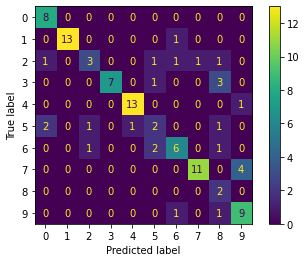

In [29]:
# based on https://www.w3schools.com/python/python_ml_confusion_matrix.asp

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, 
    display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()

In [30]:
y_err = y_predicted[ y_predicted != y_actual ]
y_err[:20]

1     8
8     2
11    8
15    8
18    8
22    2
30    5
34    9
38    5
44    8
45    0
47    6
49    9
52    4
54    5
59    0
66    5
72    0
73    6
74    6
Name: Predicted, dtype: int64

#### Error Rate

"o valor da taxa de erro (calculada como o número de todas as previsões incorretas dividido pelo número total do conjunto de dados. A melhor taxa de erro é 0, enquanto a pior é 1.)"

In [31]:
error_rate = len(y_err) / total_examples_test
print( f'error_rate: {error_rate:.3}' )

error_rate: 0.26


In [32]:
error_rate_percentage = len(y_err) / total_examples_test * 100
print( f'error_rate_percentage: {error_rate_percentage:.3}%' )

error_rate_percentage: 26.0%
